### **Sign Digits Classification Neural Network**

#### Importing Necessary Libraries

In [21]:
import os
import numpy as np 
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as img

from tensorflow import keras
from keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Flatten, Dense, Dropout,Activation
from keras.models import Sequential, load_model
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

#### Loading and knowing our Data

In [3]:
x = np.load('C:/Users/tajam/Blend/MachineLearning/datasets/Sign-language-digits-dataset/X.npy')
y = np.load('C:/Users/tajam/Blend/MachineLearning/datasets/Sign-language-digits-dataset/Y.npy')

print("x - max :",x.max())
print("x - min :",x.min())
print("x - shape :",x.shape)

print("y - max :",y.max())
print("y - min :",y.min())
print("y - shape :",y.shape)

x - max : 1.0
x - min : 0.003921569
x - shape : (2062, 64, 64)
y - max : 1.0
y - min : 0.0
y - shape : (2062, 10)


##### Creating a function for saving Figures

In [16]:
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

##### Loading sample data

Saving figure Data Sample


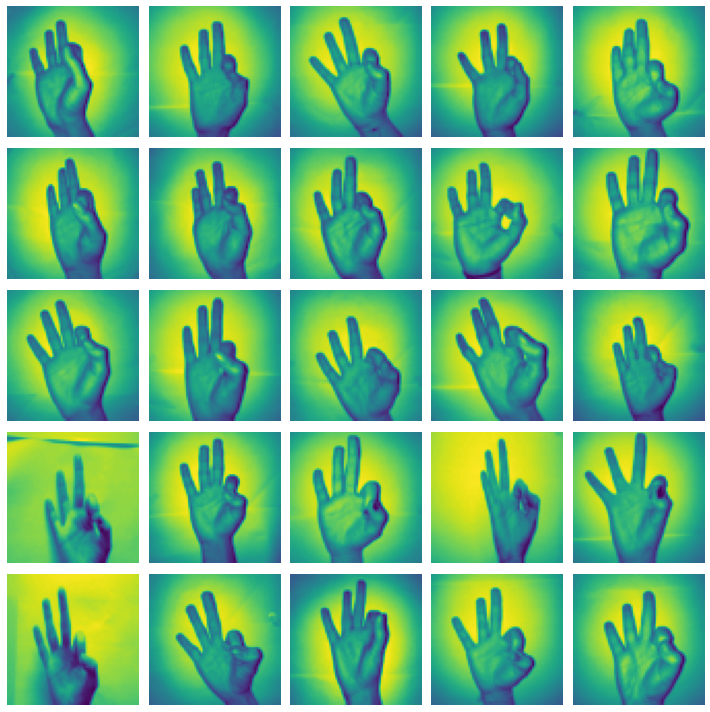

In [17]:
def show_sample():
  plt.figure(figsize=(10,10))
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(x[n])
      plt.axis('off')
show_sample()
save_fig("Data Sample")

#### **Building the Model**

#### Preparing Data 

In [44]:
x_, x_test, y_, y_test = train_test_split(x, y, test_size = 0.1, random_state = 42)
x_train, x_val, y_train, y_val = train_test_split(x_, y_, test_size = 0.1, random_state = 42)


x_train = x_train.reshape(-1,64,64,1)
x_test = x_test.reshape(-1,64,64,1)
x_val = x_val.reshape(-1,64,64,1)


print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)

(1669, 64, 64, 1)
(1669, 10)
(186, 64, 64, 1)
(186, 10)
(207, 64, 64, 1)
(207, 10)


#### Building Model

In [45]:
def buildModel():
    model = Sequential()
    model.add(Conv2D(32,(3,3), padding='same', input_shape=(64, 64,1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # 2nd Convolution layer
    model.add(Conv2D(64,(1,1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # 3rd Convolution layer
    model.add(Conv2D(128,(3,3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # 4th Convolution layer
    model.add(Conv2D(256,(3,3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Flattening
    model.add(Flatten())

    # Fully connected layer 1st layer
    model.add(Dense(512))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))

    model.add(Dense(10, activation='softmax'))
    return model
   

In [46]:
model = buildModel()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 64, 64, 32)        320       
                                                                 
 batch_normalization_10 (Bat  (None, 64, 64, 32)       128       
 chNormalization)                                                
                                                                 
 activation_10 (Activation)  (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 64)       

In [47]:
epoch = 100
BATCH_SIZE = 32
lr = 0.0001

In [48]:
optimizer = Adam(learning_rate =lr, beta_1 = 0.9, beta_2 = 0.999)

In [49]:
model.compile(optimizer,
            loss='CategoricalCrossentropy',
            metrics=['accuracy'])

#### Training the Model

In [51]:
history = model.fit(x_train, 
                    y_train,epochs=epoch,
                    batch_size=BATCH_SIZE,
                    validation_data=(x_val,y_val))


Epoch 1/100
53/53 [==============================] - 12s 219ms/step - loss: 1.1256 - accuracy: 0.6147 - val_loss: 2.5386 - val_accuracy: 0.0821
Epoch 2/100
53/53 [==============================] - 12s 219ms/step - loss: 1.0016 - accuracy: 0.6447 - val_loss: 2.6229 - val_accuracy: 0.0821
Epoch 3/100
53/53 [==============================] - 11s 213ms/step - loss: 0.8529 - accuracy: 0.6998 - val_loss: 2.6229 - val_accuracy: 0.1063
Epoch 4/100
53/53 [==============================] - 10s 198ms/step - loss: 0.7792 - accuracy: 0.7400 - val_loss: 2.6150 - val_accuracy: 0.1449
Epoch 5/100
53/53 [==============================] - 10s 190ms/step - loss: 0.7107 - accuracy: 0.7693 - val_loss: 2.5611 - val_accuracy: 0.1063
Epoch 6/100
53/53 [==============================] - 10s 191ms/step - loss: 0.7029 - accuracy: 0.7639 - val_loss: 2.4644 - val_accuracy: 0.1111
Epoch 7/100
53/53 [==============================] - 10s 191ms/step - loss: 0.6160 - accuracy: 0.7939 - val_loss: 2.3323 - val_accuracy:

#### Evaluating The Model

In [53]:
scores = model.evaluate(x_val, y_val, verbose=0)
scores

[0.26879769563674927, 0.9354838728904724]

Saving figure Model Accuracy
Saving figure Model Loss


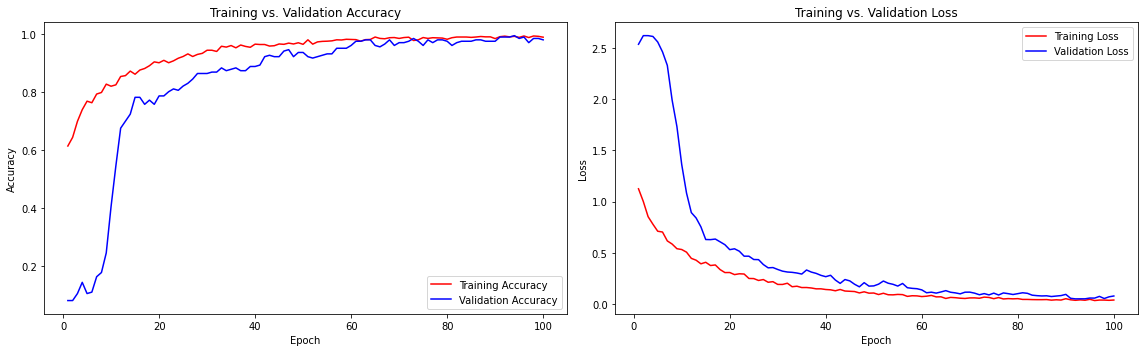

In [54]:
acc = history.history['accuracy']
loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize = (16, 5))

plt.subplot(1,2,1)
plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
save_fig("Model Accuracy")

plt.subplot(1,2,2)
plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training vs. Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
save_fig("Model Loss")

#### Making Prediction on Test Data

7/7 [==============================] - 1s 65ms/step


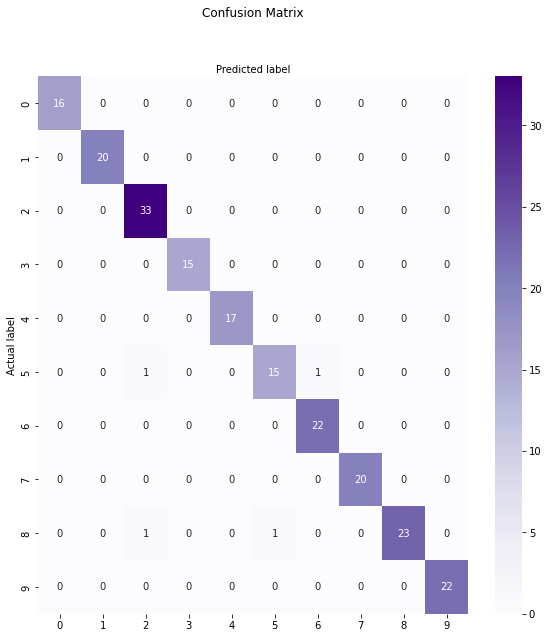

Saving figure Confusion Matrix


<Figure size 432x288 with 0 Axes>

In [55]:
y_head = model.predict(x_test)

confusion_matrix= confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_head, axis=1))
class_names=[0,1,2,3,4,5,6,7,8,9]

fig, ax = plt.subplots(figsize=(8,8))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="Purples" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()
save_fig("Confusion Matrix")

#### Saving Model for Future

In [56]:
model.save("SignDigitsNN.h5")
loadedmodel = load_model("signDigitsNN.h5")
loss, accuracy = loadedmodel.evaluate(x_test, y_test)

7/7 [==============================] - 1s 52ms/step - loss: 0.0775 - accuracy: 0.9807
